In [148]:
# import libery
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [149]:
# read preprocessing dataset
df = pd.read_csv ('preprocessing_data.csv', parse_dates=['Date Joined'])

In [150]:
# dataset top 5 records
df.head()

,Platform,Owner,Primary Usage,Country,Daily Time Spent (min),Verified Account,Date Joined
0,WhatsApp,Meta,Messaging,Switzerland,113.94,Yes,2019-03-03
1,WeChat,Tencent,Messaging and social media,Madagascar,49.63,Yes,2023-09-21
2,Snapchat,Snap Inc.,Multimedia messaging,Pitcairn Islands,29.01,Yes,2020-12-13
3,Instagram,Meta,Photo and video sharing,Timor-Leste,295.43,Yes,2019-04-21
4,Threads,Meta,Text-based social networking,Bermuda,71.78,No,2015-07-14


# Data Analysis - EDA

<h4>1. Which platform is being used the most?</h4>

In [151]:
most_used_paltform = df['Platform'].value_counts().reset_index()
most_used_paltform.columns = ['Platform' , 'Used Number']

In [152]:
most_used_paltform

,Platform,Used Number
0,Reddit,764
1,Instagram,745
2,WeChat,742
3,Threads,724
4,TikTok,716
5,LinkedIn,710
6,YouTube,709
7,Facebook,709
8,X (formerly Twitter),706
9,Pinterest,704


<h4>Observation of this analysis </h4>
<P>Reddit Platform used most , used number = 764</P>


<h4>Which platform is being used the most? - showing by pie chart</h4>

In [153]:
plot = px.pie (most_used_paltform ,values="Used Number" , names = 'Platform')
plot.show()

<h4>2. How much Average time is spent on each platform?</h4>

In [154]:
daily_avg_spent = df.groupby('Platform')['Daily Time Spent (min)'].mean().reset_index()
print("Average Time Spent per Platform :")
daily_avg_spent

Average Time Spent per Platform :


,Platform,Daily Time Spent (min)
0,Facebook,157.957348
1,Instagram,147.377611
2,LinkedIn,153.102577
3,Pinterest,156.384517
4,Quora,148.332460
5,Reddit,150.841688
6,Snapchat,155.529886
7,Telegram,155.287385
8,Threads,154.505401
9,TikTok,154.715712


<h4>Observation of this analysis </h4>
<P>Most Averager spent Platform is Facebook : 157.95</P>

<h4>How much Average time is spent on each platform? - showing by linechart </h4>

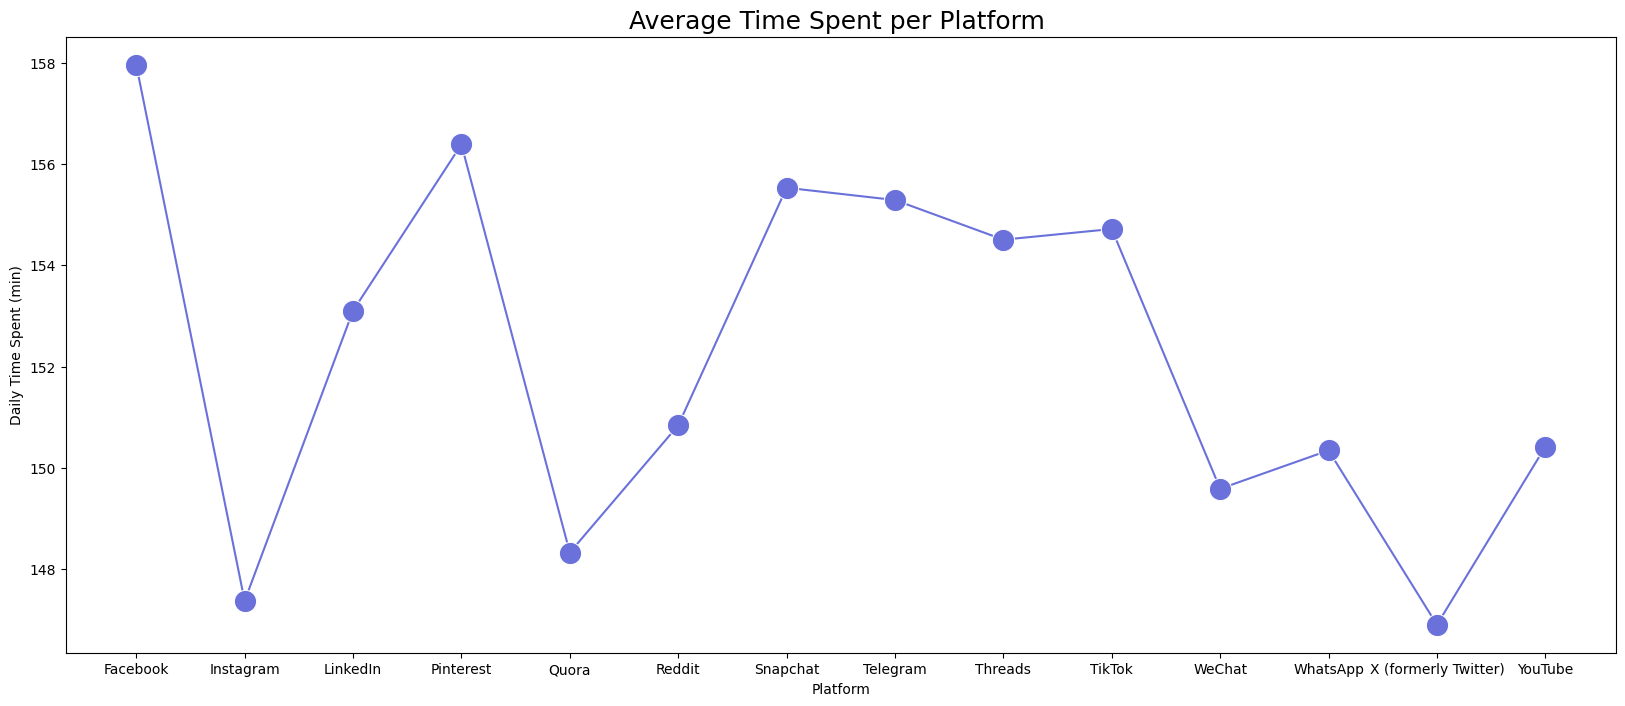

In [155]:
plt.figure(figsize=(20,8))
sns.lineplot(daily_avg_spent , x = "Platform" , y = "Daily Time Spent (min)", marker="o",markersize=16,color="#6A71DB")
plt.title("Average Time Spent per Platform " , fontsize=18)
plt.show()

<h4>3. Which platform is more popular in which country?</h4>

In [156]:
counrty_paltform = df.groupby(['Platform' , "Country"])["Daily Time Spent (min)"].sum().sort_values(ascending=False).reset_index()
popular_by_country = counrty_paltform.loc[counrty_paltform.groupby("Country")["Daily Time Spent (min)"].idxmax()]
popular_by_country

,Platform,Country,Daily Time Spent (min)
68,WeChat,Afghanistan,1207.94
121,YouTube,Albania,1094.87
418,WhatsApp,Algeria,809.53
72,Reddit,American Samoa,1200.39
214,Reddit,Andorra,966.26
...,...,...,...
375,X (formerly Twitter),Wallis and Futuna,832.40
361,Quora,Western Sahara,842.32
61,Pinterest,Yemen,1223.33
275,Pinterest,Zambia,902.18


<h4>Observation of this analysis </h4>
<P>WeChat Platform used most Afghanistan country , Daily Time Spent (min) : 1207.94
</P>

 Which platform is more popular in which country? - showing by choropleth chart

In [157]:
fig = px.choropleth(
    df,
    locations="Country",
    locationmode="country names",
    color="Daily Time Spent (min)",
    hover_name="Platform",
    title="Most Popular Platform by Country (Time Spent)"
)
fig.show()

<h4>4. Number and percentage of verified accounts</h4>

In [158]:
count = df["Verified Account"].value_counts()
percent = df["Verified Account"].value_counts(normalize=True) * 100

print("Verified Account Count:\n", count)
print("\nVerified Account Percentage:\n", percent.round(2))

Verified Account Count:
 Verified Account
No     5006
Yes    4994
Name: count, dtype: int64

Verified Account Percentage:
 Verified Account
No     50.06
Yes    49.94
Name: proportion, dtype: float64


Number and percentage of verified accounts? -showing by donut chart

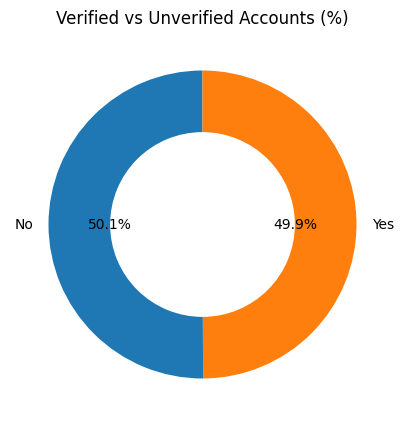

In [159]:
plt.figure(figsize=(5,5))
plt.pie(count, labels=count.index, autopct="%1.1f%%", startangle=90, wedgeprops={'width':0.4})
plt.title("Verified vs Unverified Accounts (%)")
plt.show()

<h4>5. In which year/month were the most accounts opened?</h4>

In [160]:
df["Year"] = df["Date Joined"].dt.year
yearly = df["Year"].value_counts().sort_index()
df["YearMonth"] = df["Date Joined"].dt.to_period("M").astype(str)
monthly = df["YearMonth"].value_counts().sort_index().reset_index()
monthly.columns = ["YearMonth", "count"]

<h4> 5. In which year/month were the most accounts opened?</h4>

In which year/month were the most accounts opened?-showing by linchart

In [161]:
plot = px.line(monthly, x="YearMonth", y="count", template="gridon")
plot.update_traces(line=dict(color="#f51c1c"))
plot.update_layout(
    title={
        'text': "year/month were the most accounts opened", 
        'font': {'size': 20}
    }
)
plot.show()

<h4>Observation of this analysis </h4>
<P> Oct 2024 were the most accounts opened : 105 Account
</P>

<h4>6. If there are multiple owners, who uses the platform the most?</h4>

In [162]:
owner_usage = df.groupby("Owner").agg(
    TotalAccounts=("Platform", "count"),
    AvgTimeSpent=("Daily Time Spent (min)", "mean"),
    TotalTimeSpent=("Daily Time Spent (min)", "sum")
).reset_index()
owner_usage = owner_usage.sort_values("TotalTimeSpent", ascending=False)

<h4>If there are multiple owners, who uses the platform the most? - showing by bar chart</h4>

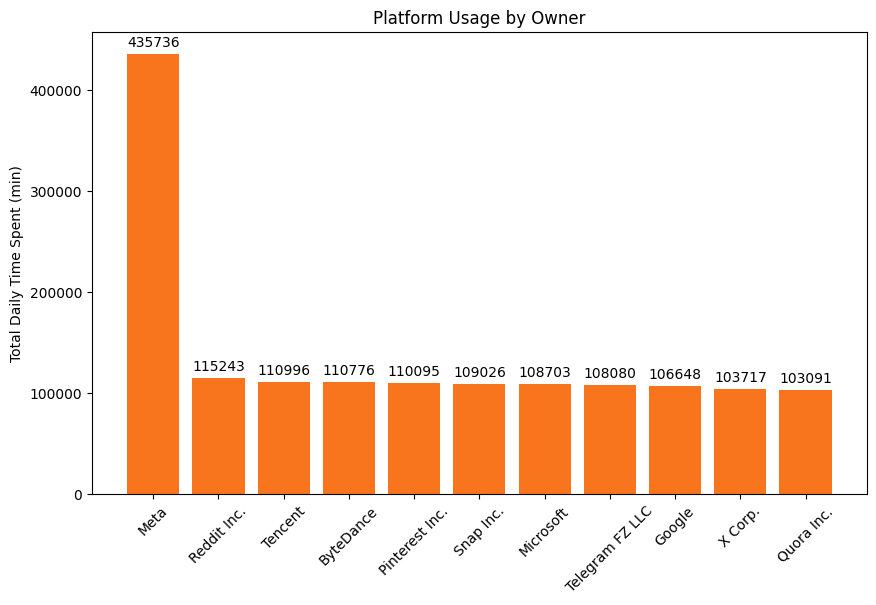

In [163]:
plt.figure(figsize=(10,6))
data = plt.bar(owner_usage["Owner"], owner_usage["TotalTimeSpent"],color = "#F8751E")
plt.bar_label(data, padding=3)
plt.xticks(rotation=45)
plt.ylabel("Total Daily Time Spent (min)")
plt.title("Platform Usage by Owner")
plt.show()

<h4>Observation of this analysis </h4>
<P> Meta Owner Platform usage tha most - daliy time spent : 400000+
</P>

<h4>7. Whether any platform is doing particularly well/worse by country.</h4>                  

In [164]:
platform_country = df.groupby(["Platform","Country"])["Daily Time Spent (min)"].mean().reset_index()
platform_country.sort_values(by = "Daily Time Spent (min)" , ascending=False)

,Platform,Country,Daily Time Spent (min)
3151,YouTube,Panama,299.31
2765,X (formerly Twitter),Algeria,298.15
409,Instagram,Saint Vincent and the Grenadines,297.17
492,LinkedIn,British Virgin Islands,296.98
1997,Threads,Palestinian Territory,296.76
...,...,...,...
666,LinkedIn,Tajikistan,8.84
2014,Threads,Saint Kitts and Nevis,8.77
2450,WeChat,New Zealand,8.58
2505,WeChat,Syrian Arab Republic,8.17


<h4><h4>Observation of this analysis </h4>
<P> Youtube Platform , Country Panama , Daily Time Spent (min) - 299.31<br>
Youtube platform is doing well 
</P></h4>                  

<h4>Whether any platform is doing particularly well/worse by country. - showing by boxplot</h4>                  

In [165]:
fig = px.box(platform_country , x="Platform",y="Daily Time Spent (min)",color="Platform",title="Distribution of Daily Time Spent per Platform")
fig.update_layout(
    width=1200,
    height=700,
    xaxis_title="Platform",
    yaxis_title="Daily Time Spent (min)"
)

fig.show()

<h4>8. How does time spent change as the account ages?</h4>                  

In [166]:
df['Account Age Day'] = (pd.to_datetime("today")-df['Date Joined']).dt.days
df["Account Age Months"] = round(df["Account Age Day"] / 30 ,2)
df2 =df.copy()

In [167]:
df2['Age Bin'] = pd.cut(df2['Account Age Months'], 
                       bins=[0, 12, 24, 36, 48, 60, 72, 84, 96, 108, 120, 130],
                       labels=["0-1y","1-2y","2-3y","3-4y","4-5y","5-6y","6-7y","7-8y","8-9y","9-10y","10-11y"])
age_usage = df2.groupby('Age Bin')['Daily Time Spent (min)'].mean().reset_index().sort_values('Age Bin')
age_usage

,Age Bin,Daily Time Spent (min)
0,0-1y,150.892504
1,1-2y,150.493170
2,2-3y,148.805158
3,3-4y,155.161980
4,4-5y,148.248389
5,5-6y,152.007256
6,6-7y,150.127733
7,7-8y,157.199673
8,8-9y,156.438216
9,9-10y,152.265266


<h4>How does time spent change as the account ages?-showing by tabel</h4>      

In [168]:
tabel = go.Figure(data=[go.Table(
    header=dict(values=["Age Bin", "Daily Time Spent (min)"],
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[age_usage['Age Bin'], age_usage['Daily Time Spent (min)']],
               fill_color='lavender',
               align='left'))
])

tabel.update_layout(title="Average Daily Time Spent by Account Age Bins")
tabel.show()

In [169]:
# save dataset
df.to_csv("data.csv",index=False)

________